<a href="https://colab.research.google.com/github/eshaanmathakari/shrimpInfectionDetection/blob/main/shrimpDet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np


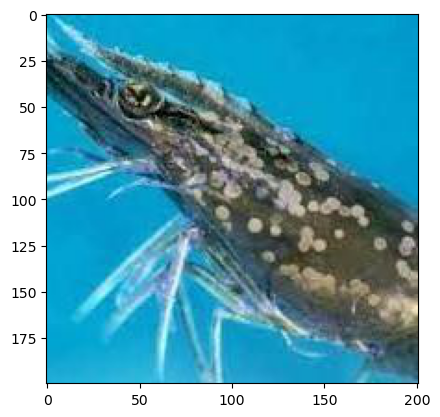

In [ ]:
img = image.load_img(r"C:\Users\Anshika\Documents\Image Classification\train\wssv\download-12-_jpg.rf.d1192aacc59feb8219f525aff249249b.jpg")
plt.imshow(img)

In [ ]:
cv2.imread(r"C:\Users\Anshika\Documents\Image Classification\train\wssv\download-12-_jpg.rf.d1192aacc59feb8219f525aff249249b.jpg").shape

(200, 201, 3)

In [ ]:
train= ImageDataGenerator(rescale=1/255)

In [ ]:
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(r"C:\Users\Anshika\Documents\Image Classification\train",target_size=(200,200),batch_size =3, class_mode='binary')

Found 155 images belonging to 2 classes.


In [ ]:
validation_dataset = train.flow_from_directory(r"C:\Users\Anshika\Documents\Image Classification\val",target_size=(200,200),batch_size =3, class_mode='binary')

Found 31 images belonging to 2 classes.


In [ ]:
dummy_test = train.flow_from_directory(r"C:\Users\Anshika\Documents\Image Classification\dummy_test", target_size=(200,200), batch_size=3,class_mode='binary')

Found 0 images belonging to 0 classes.


In [ ]:
train_dataset.class_indices

{'healthy': 0, 'wssv': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
dummy_test.classes

array([], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
modelfit = model.fit(train_dataset,
                    steps_per_epoch=8,
                    epochs=13,
                    validation_data = validation_dataset)

Epoch 1/13
8/8 [==============================] - 4s 526ms/step - loss: 0.6388 - accuracy: 0.7500 - val_loss: 0.6015 - val_accuracy: 0.6452
Epoch 2/13
8/8 [==============================] - 3s 458ms/step - loss: 0.6137 - accuracy: 0.7500 - val_loss: 0.4954 - val_accuracy: 0.8387
Epoch 3/13
8/8 [==============================] - 3s 350ms/step - loss: 0.6475 - accuracy: 0.7826 - val_loss: 0.5085 - val_accuracy: 0.8710
Epoch 4/13
8/8 [==============================] - 2s 313ms/step - loss: 0.5230 - accuracy: 0.7500 - val_loss: 0.4319 - val_accuracy: 0.8387
Epoch 5/13
8/8 [==============================] - 2s 305ms/step - loss: 0.4390 - accuracy: 0.7500 - val_loss: 0.4282 - val_accuracy: 0.8387
Epoch 6/13
8/8 [==============================] - 2s 303ms/step - loss: 0.6047 - accuracy: 0.7500 - val_loss: 0.3964 - val_accuracy: 0.8387
Epoch 7/13
8/8 [==============================] - 3s 340ms/step - loss: 0.4758 - accuracy: 0.8333 - val_loss: 0.3628 - val_accuracy: 0.8387
Epoch 8/13
8/8 [====

In [ ]:
import os, sys, stat

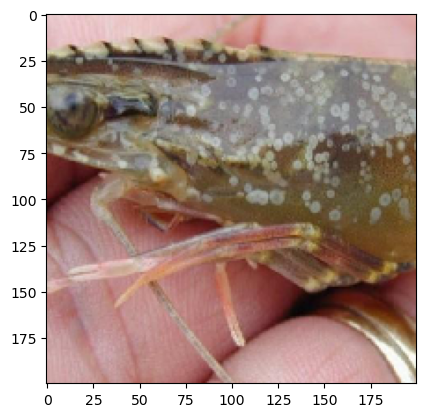

1/1 [==============================] - 0s 57ms/step
[[0.]]
This shrimp is healthy.


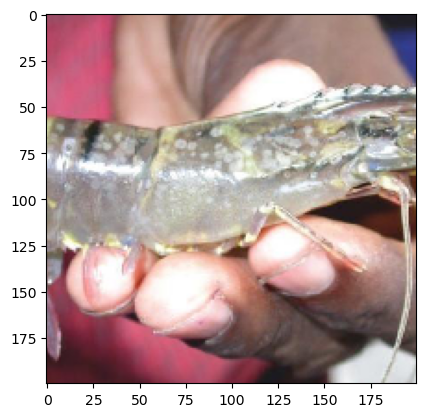

1/1 [==============================] - 0s 40ms/step
[[1.]]
This shrimp is infected with wssv


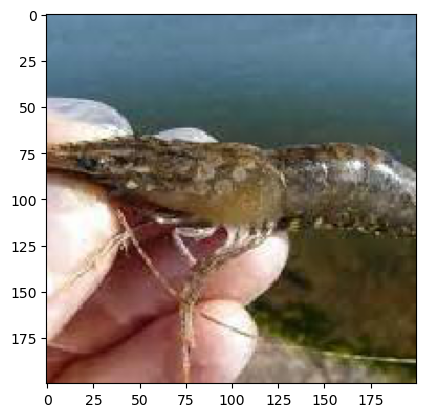

1/1 [==============================] - 0s 49ms/step
[[1.]]
This shrimp is infected with wssv


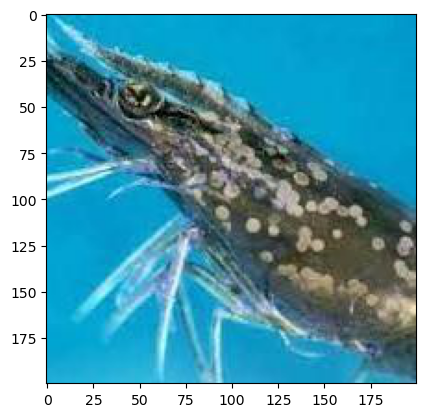

1/1 [==============================] - 0s 49ms/step
[[0.]]
This shrimp is healthy.


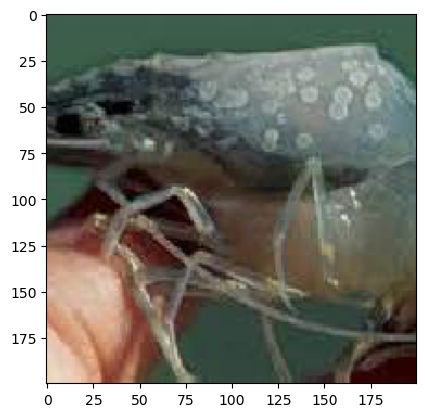

1/1 [==============================] - 0s 54ms/step
[[1.]]
This shrimp is infected with wssv


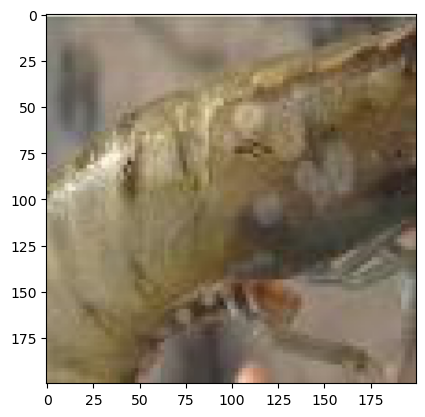

1/1 [==============================] - 0s 32ms/step
[[0.]]
This shrimp is healthy.


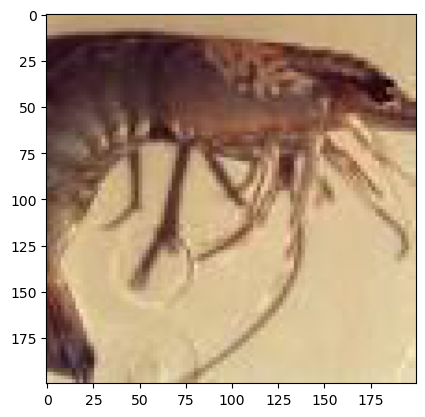

1/1 [==============================] - 0s 40ms/step
[[0.]]
This shrimp is healthy.


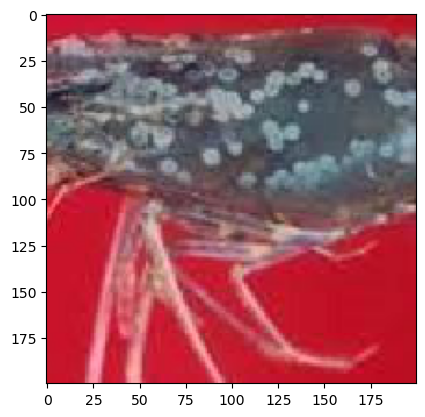

1/1 [==============================] - 0s 29ms/step
[[1.]]
This shrimp is infected with wssv


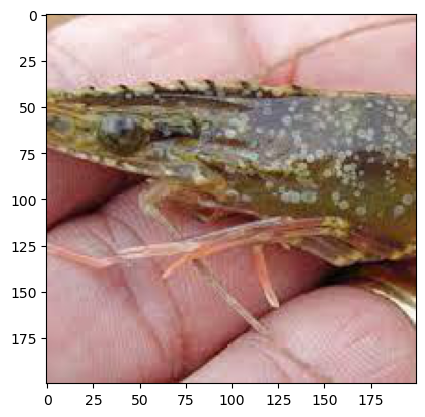

1/1 [==============================] - 0s 38ms/step
[[0.]]
This shrimp is healthy.


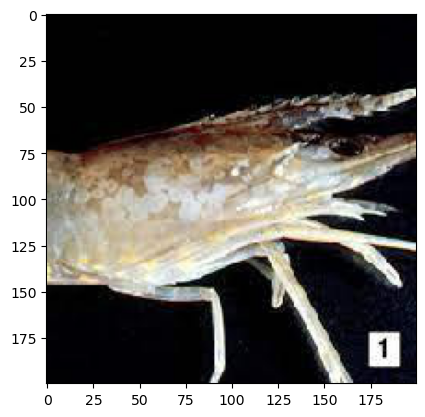

1/1 [==============================] - 0s 40ms/step
[[9.941056e-06]]
This shrimp is infected with wssv


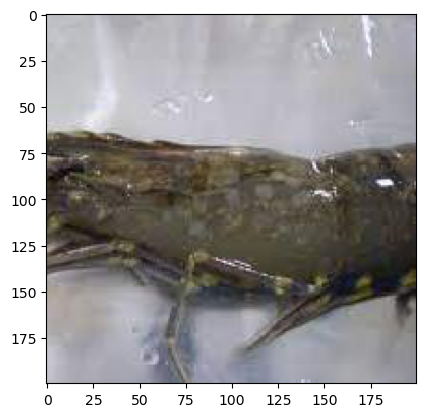

1/1 [==============================] - 0s 40ms/step
[[0.]]
This shrimp is healthy.


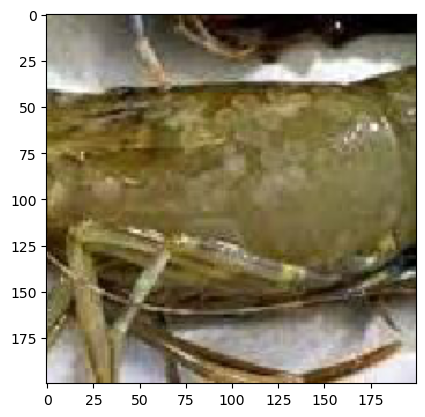

1/1 [==============================] - 0s 42ms/step
[[1.]]
This shrimp is infected with wssv


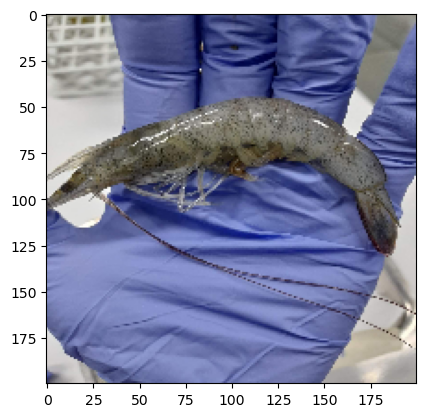

1/1 [==============================] - 0s 48ms/step
[[0.]]
This shrimp is healthy.


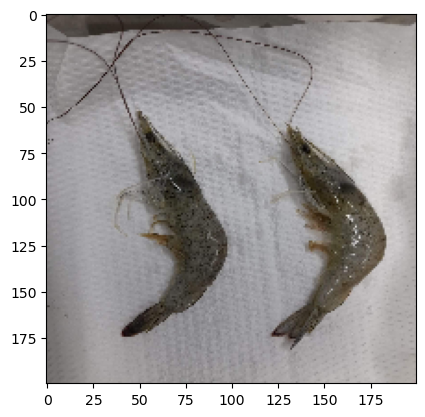

1/1 [==============================] - 0s 46ms/step
[[0.]]
This shrimp is healthy.


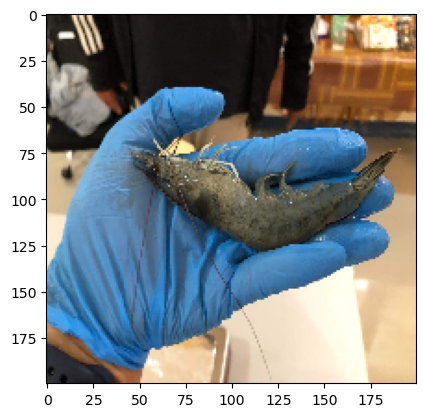

1/1 [==============================] - 0s 48ms/step
[[0.]]
This shrimp is healthy.


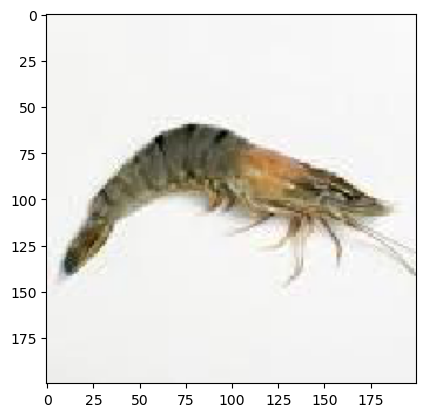

1/1 [==============================] - 0s 43ms/step
[[0.]]
This shrimp is healthy.


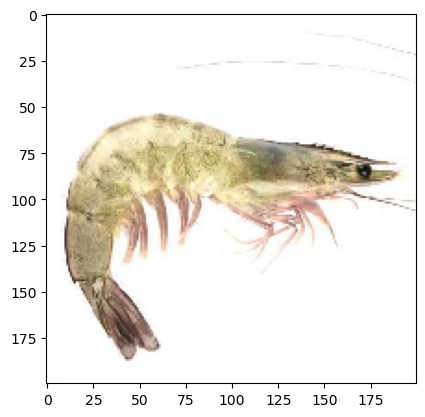

1/1 [==============================] - 0s 42ms/step
[[0.]]
This shrimp is healthy.


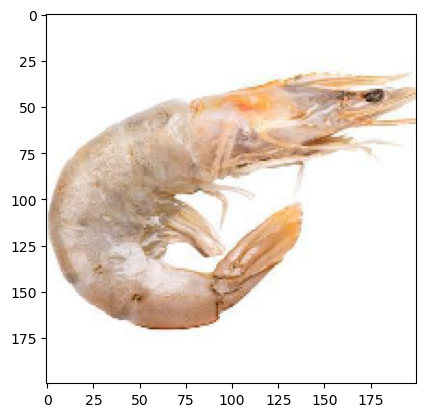

1/1 [==============================] - 0s 27ms/step
[[0.]]
This shrimp is healthy.


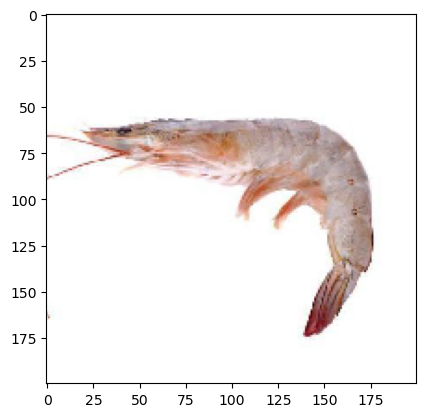

1/1 [==============================] - 0s 46ms/step
[[0.]]
This shrimp is healthy.


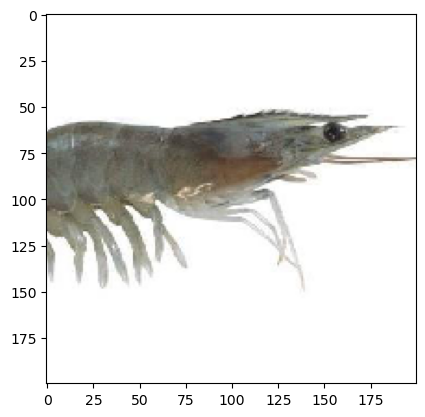

1/1 [==============================] - 0s 32ms/step
[[0.]]
This shrimp is healthy.


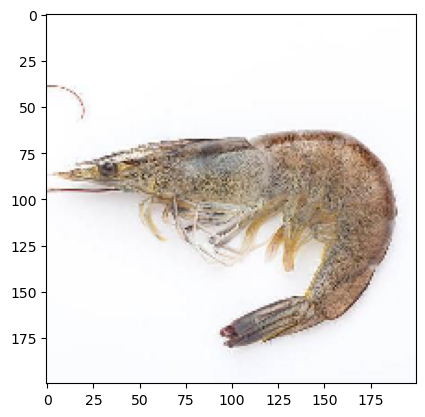

1/1 [==============================] - 0s 32ms/step
[[0.]]
This shrimp is healthy.


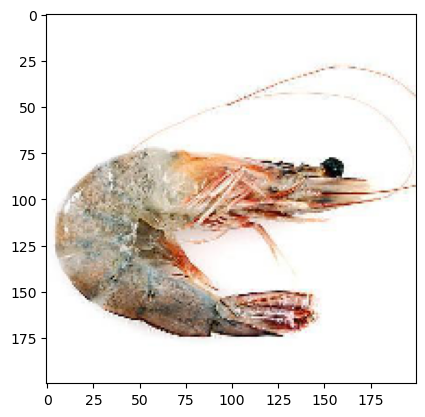

1/1 [==============================] - 0s 42ms/step
[[0.]]
This shrimp is healthy.


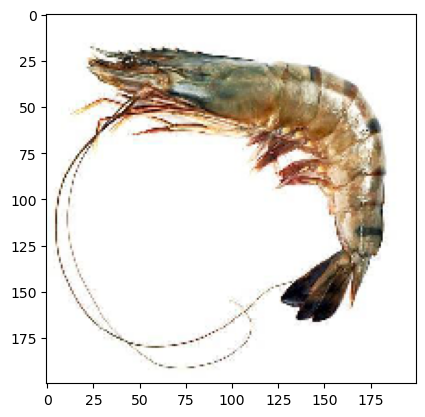

1/1 [==============================] - 0s 37ms/step
[[0.]]
This shrimp is healthy.


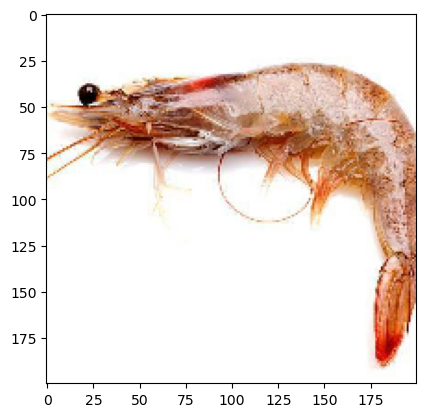

1/1 [==============================] - 0s 34ms/step
[[0.]]
This shrimp is healthy.


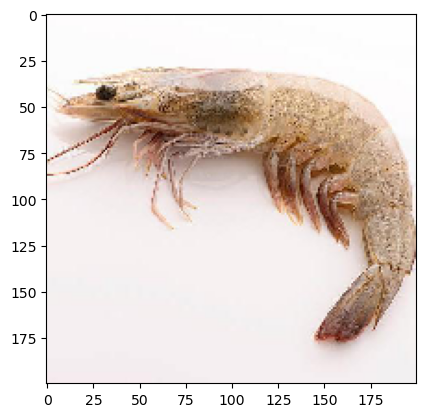

1/1 [==============================] - 0s 37ms/step
[[0.]]
This shrimp is healthy.


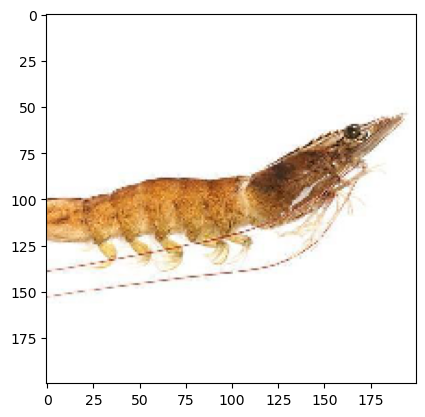

1/1 [==============================] - 0s 38ms/step
[[0.]]
This shrimp is healthy.


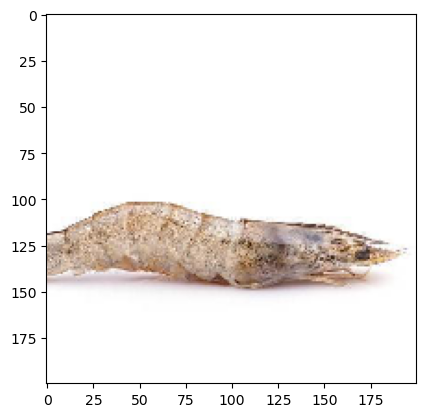

1/1 [==============================] - 0s 41ms/step
[[0.]]
This shrimp is healthy.


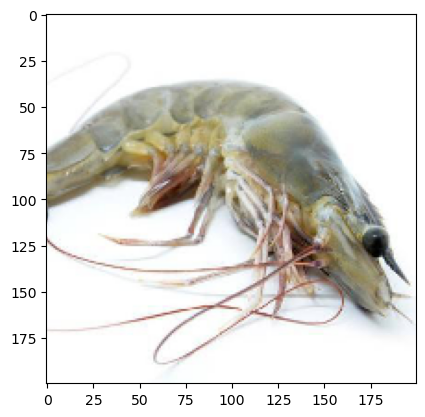

1/1 [==============================] - 0s 33ms/step
[[0.]]
This shrimp is healthy.


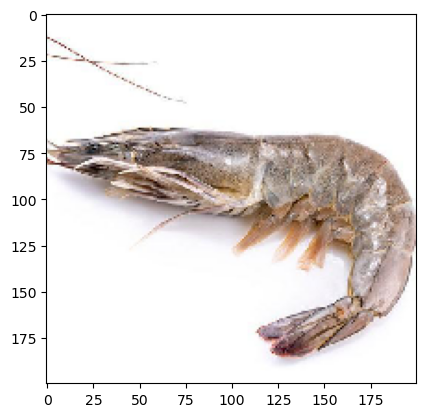

1/1 [==============================] - 0s 28ms/step
[[0.]]
This shrimp is healthy.


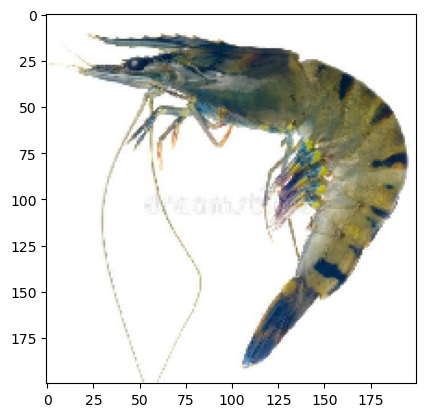

1/1 [==============================] - 0s 32ms/step
[[0.]]
This shrimp is healthy.


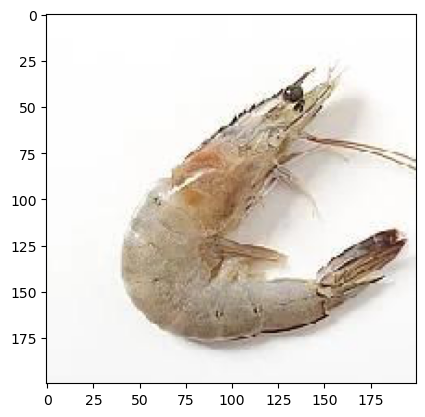

1/1 [==============================] - 0s 33ms/step
[[0.]]
This shrimp is healthy.


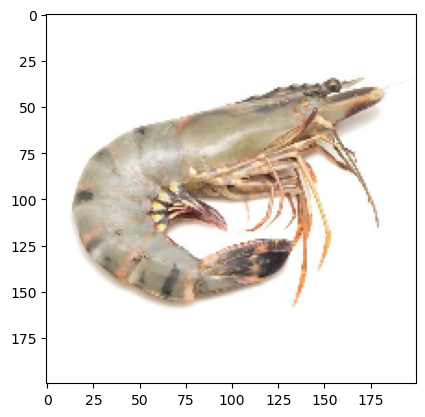

1/1 [==============================] - 0s 34ms/step
[[0.]]
This shrimp is healthy.


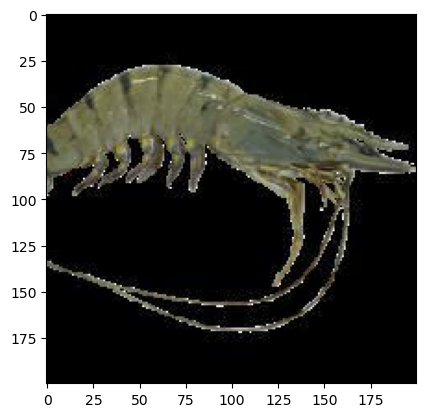

1/1 [==============================] - 0s 32ms/step
[[0.]]
This shrimp is healthy.


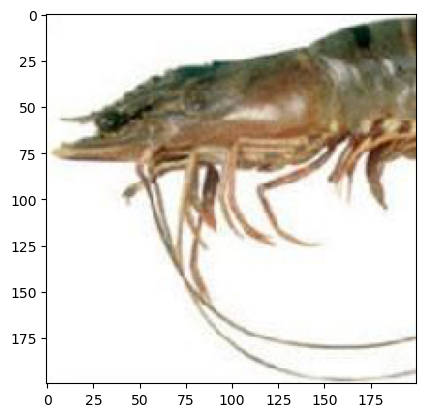

1/1 [==============================] - 0s 37ms/step
[[0.]]
This shrimp is healthy.


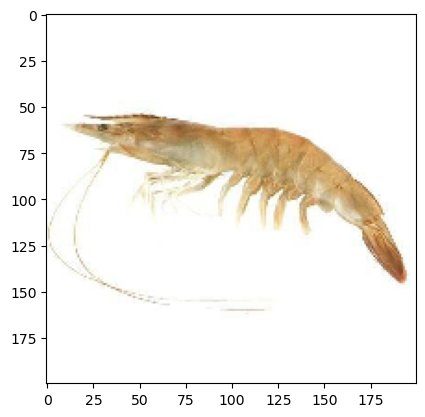

1/1 [==============================] - 0s 37ms/step
[[0.]]
This shrimp is healthy.


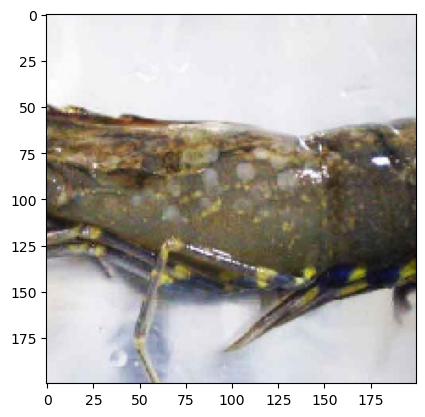

1/1 [==============================] - 0s 34ms/step
[[0.]]
This shrimp is healthy.


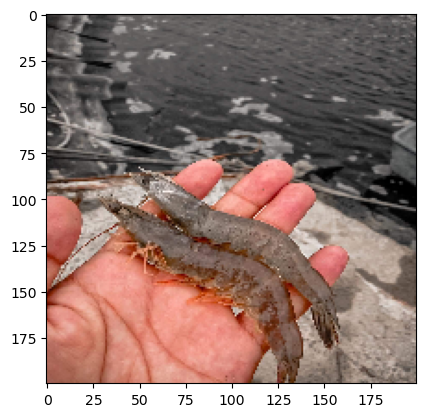

1/1 [==============================] - 0s 32ms/step
[[1.]]
This shrimp is infected with wssv


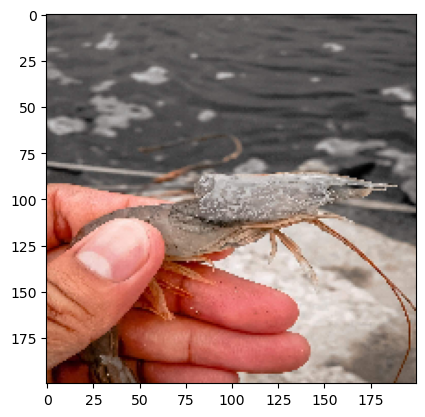

1/1 [==============================] - 0s 23ms/step
[[1.]]
This shrimp is infected with wssv


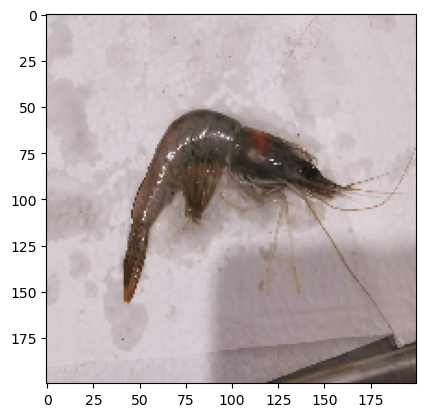

1/1 [==============================] - 0s 24ms/step
[[0.]]
This shrimp is healthy.


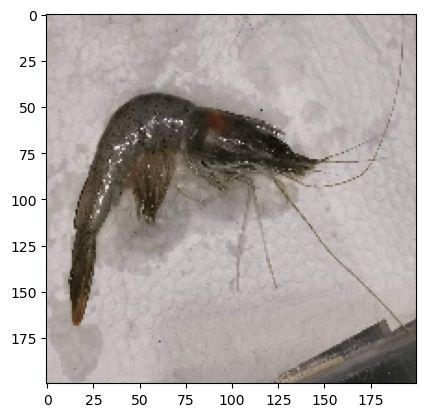

1/1 [==============================] - 0s 37ms/step
[[0.]]
This shrimp is healthy.


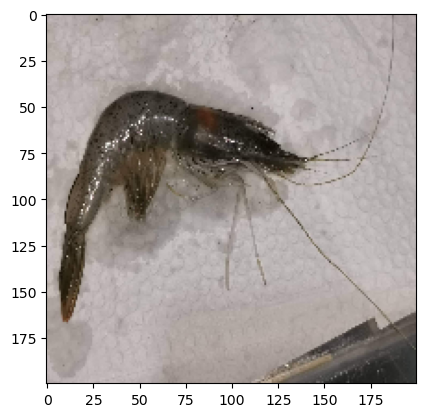

1/1 [==============================] - 0s 19ms/step
[[0.]]
This shrimp is healthy.


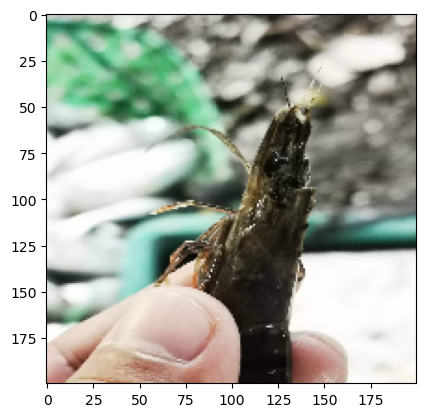

1/1 [==============================] - 0s 24ms/step
[[0.]]
This shrimp is healthy.


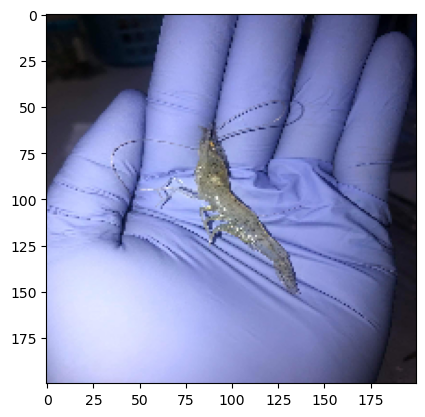

1/1 [==============================] - 0s 24ms/step
[[0.]]
This shrimp is healthy.


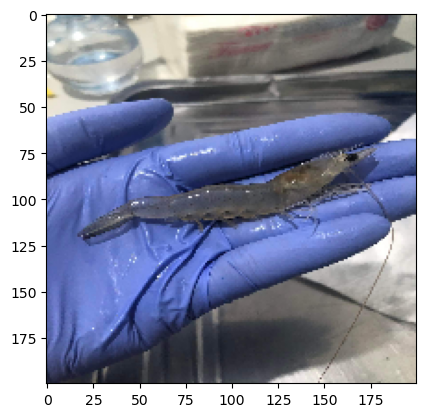

1/1 [==============================] - 0s 31ms/step
[[0.]]
This shrimp is healthy.


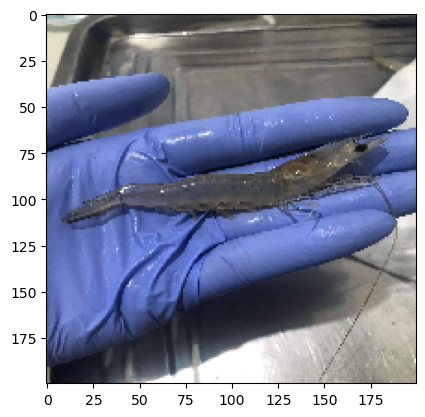

1/1 [==============================] - 0s 24ms/step
[[0.]]
This shrimp is healthy.


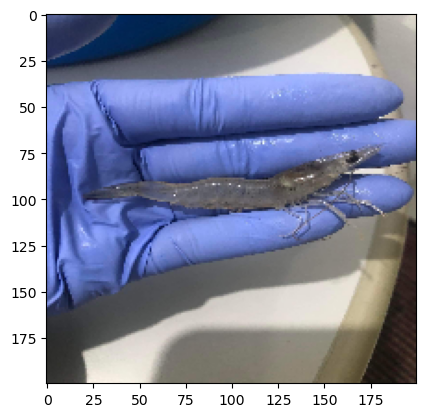

1/1 [==============================] - 0s 29ms/step
[[0.]]
This shrimp is healthy.


In [ ]:
import os
dir_files = os.listdir(r"C:\Users\Anshika\Documents\Image Classification\dummy_test")
dir_path = r"C:\Users\Anshika\Documents\Image Classification\dummy_test"

for file in dir_files:
    img = image.load_img(dir_path+'/'+ file, target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X=image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    images = np.vstack([X])

    val =  model.predict(images)
    print(val)
    if val==0:
        print("This shrimp is healthy.")
    else:
        print("This shrimp is infected with wssv")

    #print(file)

#for f in healthy_files:
    #img = image.load_img(healthy_path+'/'+ f)
    #plt.imshow(img)
    #plt.show()







